## Hepatitis C Diagnosis with Key Indicators 

In [42]:
# Packages needed for modeling and analysis

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix, recall_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from math import sqrt
import re
import os
import string
import nltk 
from nltk.corpus import stopwords
import category_encoders as cat_encoder
import math

# Explanatory Data Analysis

In [90]:
# Importing Dataset to Dataframe
df = pd.read_csv('HepatitisCdata.csv')

In [44]:
# Top 5 rows and column headers
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [45]:
# Rows and Columns of dataset
df.shape

(615, 13)

In [46]:
# Finding Nulls
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [57]:
#Remove all Nulls
df = df.dropna()

In [58]:
# Finding Nulls
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [59]:
# Info on data
df.info

<bound method DataFrame.info of      Category  Age  Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA  \
0           0   32    0  38.5   52.5   7.7   22.1   7.5   6.93  3.23  106.0   
1           0   32    0  38.5   70.3  18.0   24.7   3.9  11.17  4.80   74.0   
2           0   32    0  46.9   74.7  36.2   52.6   6.1   8.84  5.20   86.0   
3           0   32    0  43.2   52.0  30.6   22.6  18.9   7.33  4.74   80.0   
4           0   32    0  39.2   74.1  32.6   24.8   9.6   9.15  4.32   76.0   
..        ...  ...  ...   ...    ...   ...    ...   ...    ...   ...    ...   
608         1   58    1  34.0   46.4  15.0  150.0   8.0   6.26  3.98   56.0   
609         1   59    1  39.0   51.3  19.6  285.8  40.0   5.77  4.51  136.1   
610         1   62    1  32.0  416.6   5.9  110.3  50.0   5.57  6.30   55.7   
611         1   64    1  24.0  102.8   2.9   44.4  20.0   1.54  3.02   63.0   
612         1   64    1  29.0   87.3   3.5   99.0  48.0   1.66  3.63   66.7   

       GGT  PROT  


In [60]:
# Data Types of columns
df.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [61]:
# Statistics of numercal data
df.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.095076,47.417657,0.383701,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,0.293570,9.931334,0.486700,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,0.000000,23.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,0.000000,47.000000,0.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,0.000000,54.000000,1.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,1.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


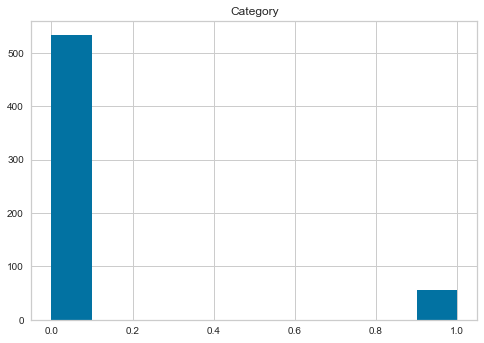

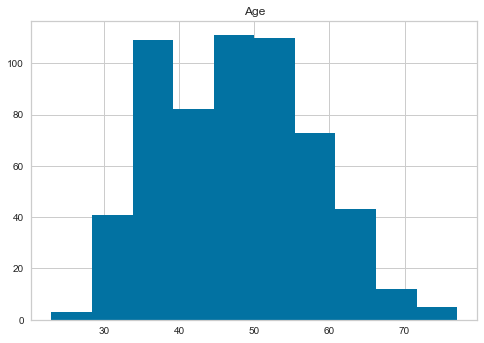

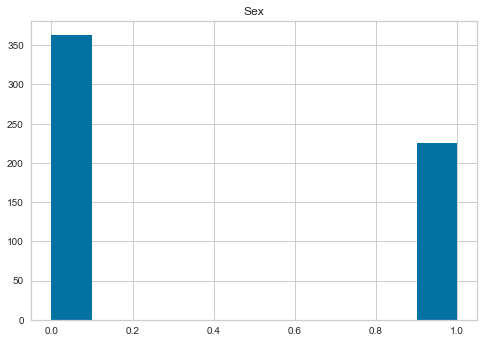

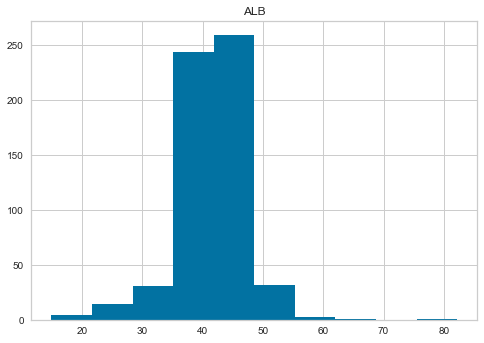

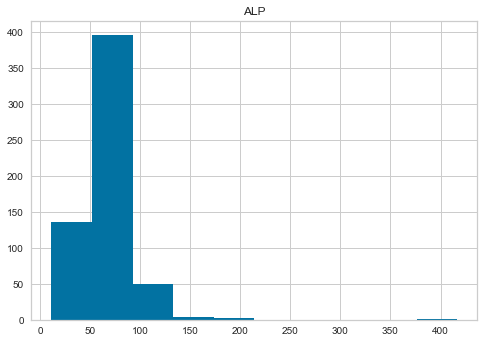

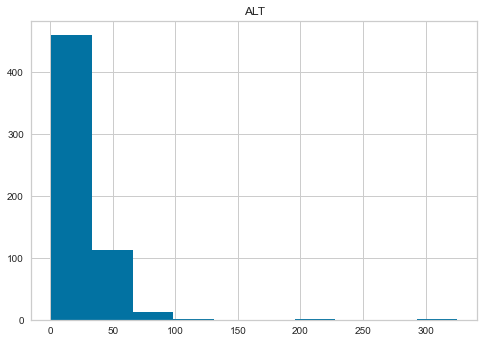

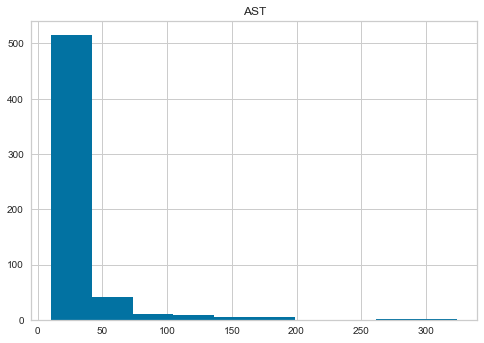

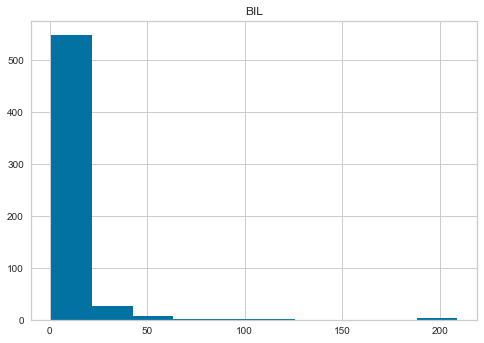

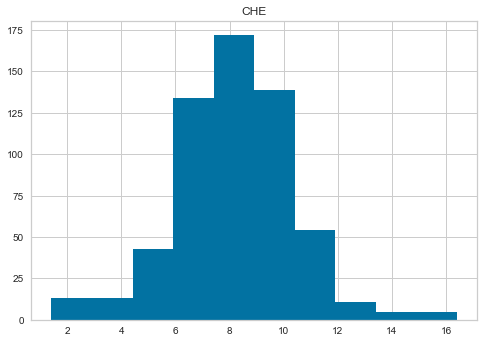

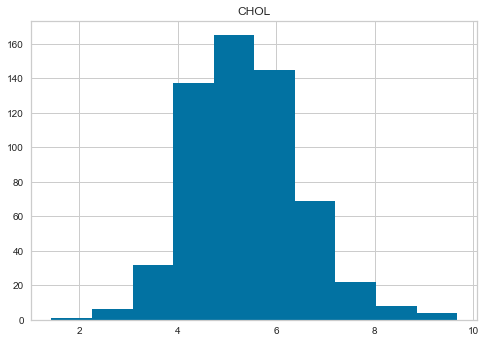

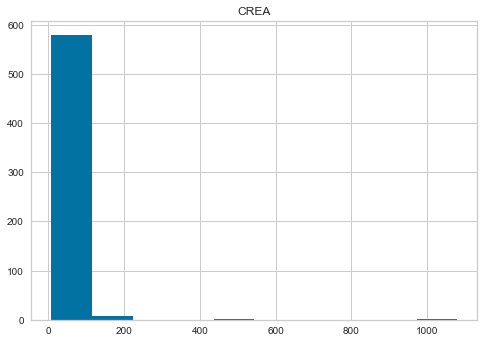

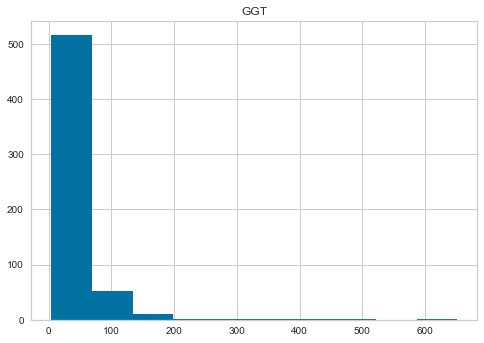

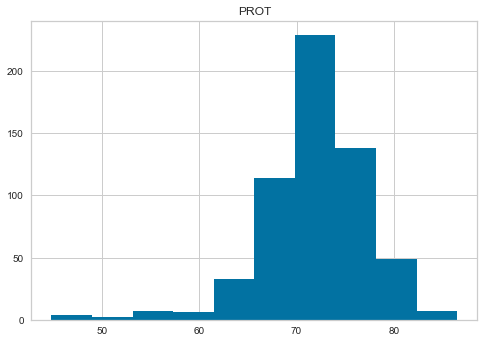

In [62]:
# Plotting Multiple Histograms to see data relation
for a in df.columns:
    df[a].hist()
    plt.title(a)
    plt.show()

<AxesSubplot:xlabel='Category', ylabel='Age'>

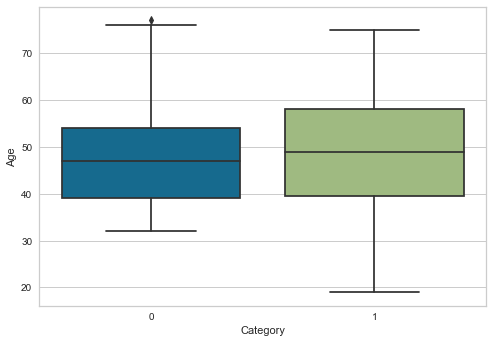

In [94]:
sns.boxplot(data=df, x='Category', y='Age')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


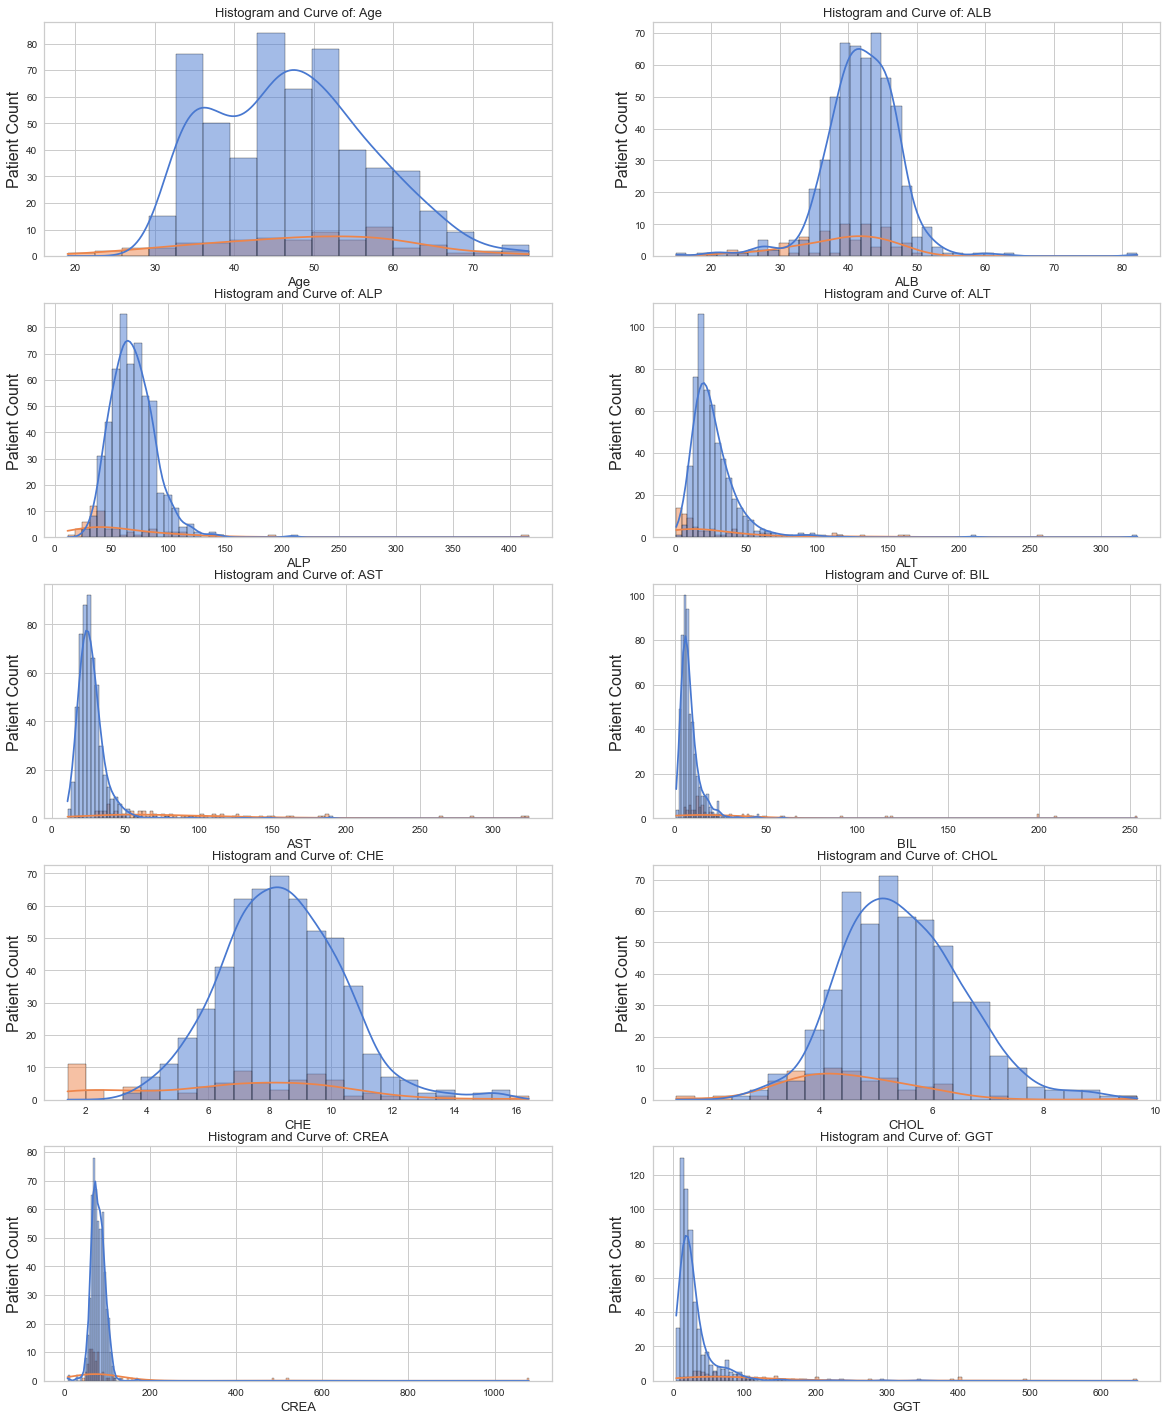

In [93]:
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

for i, col in enumerate(columns):
    sns.histplot(x=df[col], hue=df["Category"], kde=True, palette="muted", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=13) 
    axes[i].set_ylabel("Patient Count", fontsize=16) 
    axes[i].set_title(f"Histogram and Curve of: {col}", fontsize=13)  
    axes[i].legend(fontsize=13) 

In [63]:
X = df.drop(columns='Category',axis=1)
y = df['Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
X_scaled

array([[-1.55374517, -0.78904343, -0.54270146, ...,  0.48033581,
        -0.48102205, -0.54078756],
       [-1.55374517, -0.78904343, -0.54270146, ..., -0.15140186,
        -0.4165134 ,  0.86256616],
       [-1.55374517, -0.78904343,  0.91641697, ...,  0.08549977,
        -0.09212705,  1.38648489],
       ...,
       [ 1.46956473,  1.26735736, -1.6717812 , ..., -0.51267684,
        11.29272798, -0.63434447],
       [ 1.67111872,  1.26735736, -3.0614178 , ..., -0.36856168,
        -0.04236324, -0.11042575],
       [ 1.67111872,  1.26735736, -2.19289492, ..., -0.29551702,
         0.47923527,  1.89169223]])

In [65]:
# Train / Test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
#Correlation
df.corr().style.background_gradient(cmap = 'viridis')

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.033022,-0.065314,-0.176916,-0.066017,-0.180160,0.626695,0.443299,-0.240874,-0.244178,0.166791,0.426055,0.019009
Age,0.033022,1.000000,0.014288,-0.191094,0.177720,-0.040576,0.072739,0.039655,-0.075863,0.124742,-0.025142,0.143379,-0.159760
Sex,-0.065314,0.014288,1.000000,-0.150091,0.007601,-0.177107,-0.129883,-0.108063,-0.181649,0.030447,-0.158068,-0.128142,-0.043296
ALB,-0.176916,-0.191094,-0.150091,1.000000,-0.146120,0.039497,-0.177609,-0.169597,0.360919,0.210420,0.001433,-0.147598,0.570726
ALP,-0.066017,0.177720,0.007601,-0.146120,1.000000,0.221603,0.067024,0.058372,0.029482,0.125900,0.153909,0.461300,-0.063085
ALT,-0.180160,-0.040576,-0.177107,0.039497,0.221603,1.000000,0.198658,-0.106797,0.224344,0.149997,-0.036106,0.219707,0.016786
AST,0.626695,0.072739,-0.129883,-0.177609,0.067024,0.198658,1.000000,0.309580,-0.197270,-0.201213,-0.017948,0.477774,0.017404
BIL,0.443299,0.039655,-0.108063,-0.169597,0.058372,-0.106797,0.309580,1.000000,-0.320713,-0.181570,0.019910,0.210567,-0.052575
CHE,-0.240874,-0.075863,-0.181649,0.360919,0.029482,0.224344,-0.197270,-0.320713,1.000000,0.428018,-0.012120,-0.095716,0.306288
CHOL,-0.244178,0.124742,0.030447,0.210420,0.125900,0.149997,-0.201213,-0.181570,0.428018,1.000000,-0.051464,0.008823,0.245050


# Modeling

In [84]:
#Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 100) 

In [85]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
y_pred = clf.predict(X_test)

In [87]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        10

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



Text(52.0, 0.5, 'Truth')

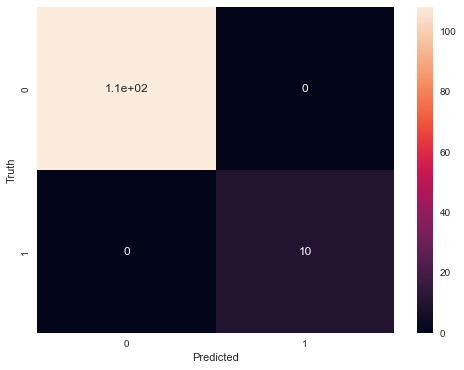

In [89]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [79]:
print('Validation R^2: %.5f'  % r2_score(y_test,clf.predict(X_test)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_test,clf.predict(X_test)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_test,clf.predict(X_test)))

Validation R^2: 1.00000
Validation RMSE: 0.00000

Validation Mean Absolute Error: 0.00000



In [72]:
model = LogisticRegression()

In [73]:
#Fitting the model
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(X_test)

In [75]:
# Measuring Accuracy Score of the Model
accuracy_score(y_test, y_pred)

0.9915254237288136

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.90      0.95        10

    accuracy                           0.99       118
   macro avg       1.00      0.95      0.97       118
weighted avg       0.99      0.99      0.99       118



Text(52.0, 0.5, 'Truth')

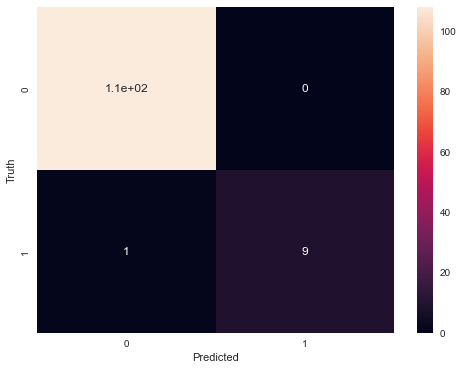

In [83]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [80]:
print('Validation R^2: %.5f'  % r2_score(y_test,model.predict(X_test)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_test,model.predict(X_test)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_test,model.predict(X_test)))

Validation R^2: 0.89074
Validation RMSE: 0.00847

Validation Mean Absolute Error: 0.00847

